In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('C:/Users/PrarshShringi/Documents/ML-Project/Proj_2_NLP/spam.csv', encoding='Windows-1252')

In [3]:
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df1.shape

(5572, 5)

<h2 <span style="color: #00b894;">DATA CLEANING --</span> </h2>

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df1.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
df1.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df1['target'] = encoder.fit_transform(df1['target'])

In [11]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df1.duplicated().sum()

403

In [14]:
# remove duplicates -- 

df1 = df1.drop_duplicates(keep='first')

In [15]:
df1.duplicated().sum()

0

In [16]:
df1.shape

(5169, 2)

<h2 <span style="color:#800000 ;">Exploratory Data Analysis --</span> </h2>

In [17]:
df1['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

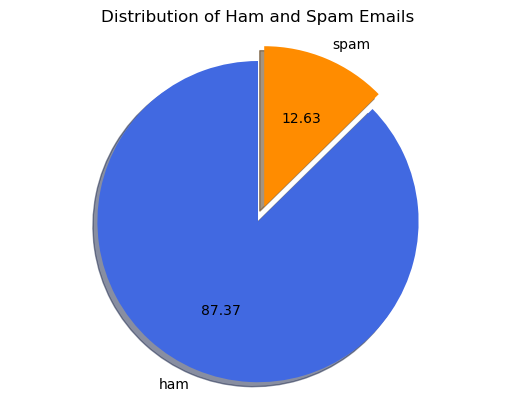

In [18]:
labels = ['ham', 'spam']
colors = ['royalblue' , 'darkorange']  
explode = (0.1, 0)  

plt.pie(df1['target'].value_counts(), labels=labels, autopct="%0.2f", startangle=90, colors=colors, explode=explode, shadow=True)
plt.axis('equal')  
plt.title('Distribution of Ham and Spam Emails')
plt.show()


In [19]:
# We can see that data is imbalance

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PrarshShringi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# num_of_characters

df1["num_of_charac"] = df1["text"].apply(len)

In [23]:
# num_of_words

df1["num_of_words"] = df1["text"].apply(lambda x : len(nltk.word_tokenize(x)))


In [24]:
# num_of_sentences

df1["num_of_sentences"] = df1['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [25]:
df1.head()

,target,text,num_of_charac,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
# for spam

round(df1[df1["target"]==0] [["num_of_charac", "num_of_words", "num_of_sentences"]].describe(),2)

,num_of_charac,num_of_words,num_of_sentences
count,4516.00,4516.00,4516.00
mean,70.46,17.12,1.80
std,56.36,13.49,1.28
min,2.00,1.00,1.00
25%,34.00,8.00,1.00
50%,52.00,13.00,1.00
75%,90.00,22.00,2.00
max,910.00,220.00,28.00


In [27]:
# for spam

round(df1[df1["target"]==1] [["num_of_charac", "num_of_words", "num_of_sentences"]].describe(),2)

,num_of_charac,num_of_words,num_of_sentences
count,653.00,653.00,653.00
mean,137.89,27.67,2.97
std,30.14,7.01,1.48
min,13.00,2.00,1.00
25%,132.00,25.00,2.00
50%,149.00,29.00,3.00
75%,157.00,32.00,4.00
max,224.00,46.00,8.00


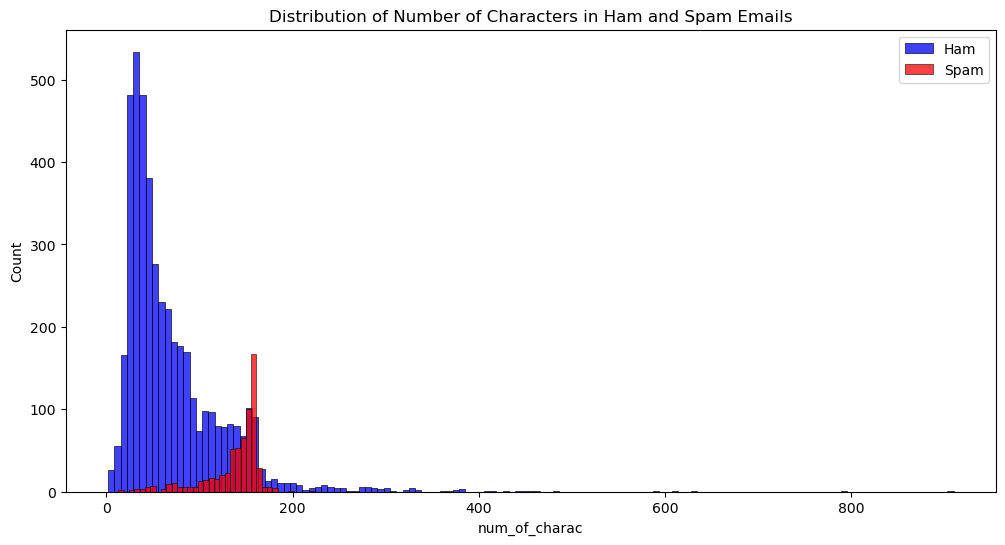

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1["target"]==0] ["num_of_charac"], color = 'blue', label='Ham')
sns.histplot(df1[df1["target"]==1] ["num_of_charac"], color = 'red', label='Spam')

plt.legend()
plt.title('Distribution of Number of Characters in Ham and Spam Emails')
plt.show()



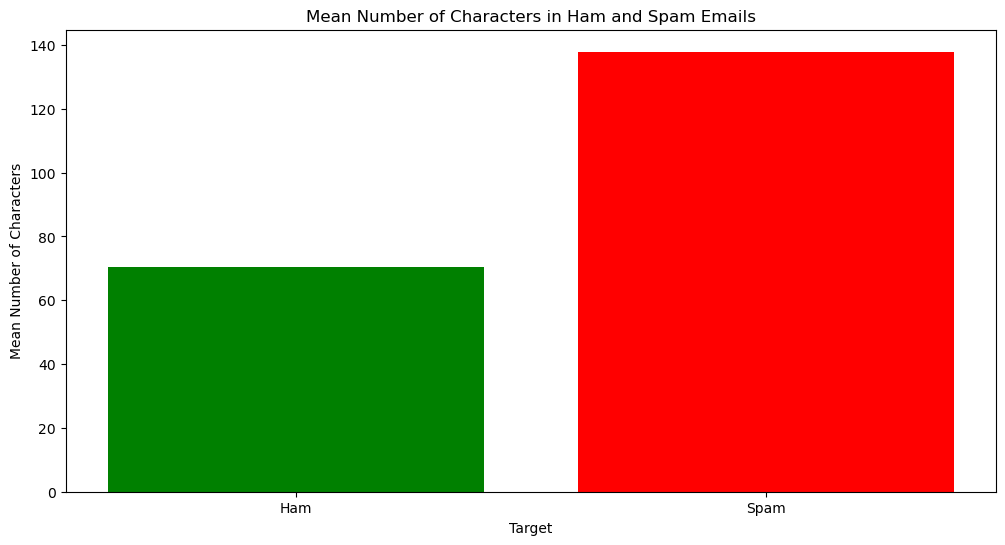

In [29]:
plt.figure(figsize=(12, 6))

# Calculate the mean values for "num_of_charac" for each target class
ham_mean = df1[df1["target"] == 0]["num_of_charac"].mean()
spam_mean = df1[df1["target"] == 1]["num_of_charac"].mean()

# Plot bar plot for mean values
plt.bar(['Ham', 'Spam'], [ham_mean, spam_mean], color=['green', 'red'])

plt.xlabel('Target')
plt.ylabel('Mean Number of Characters')
plt.title('Mean Number of Characters in Ham and Spam Emails')
plt.show()

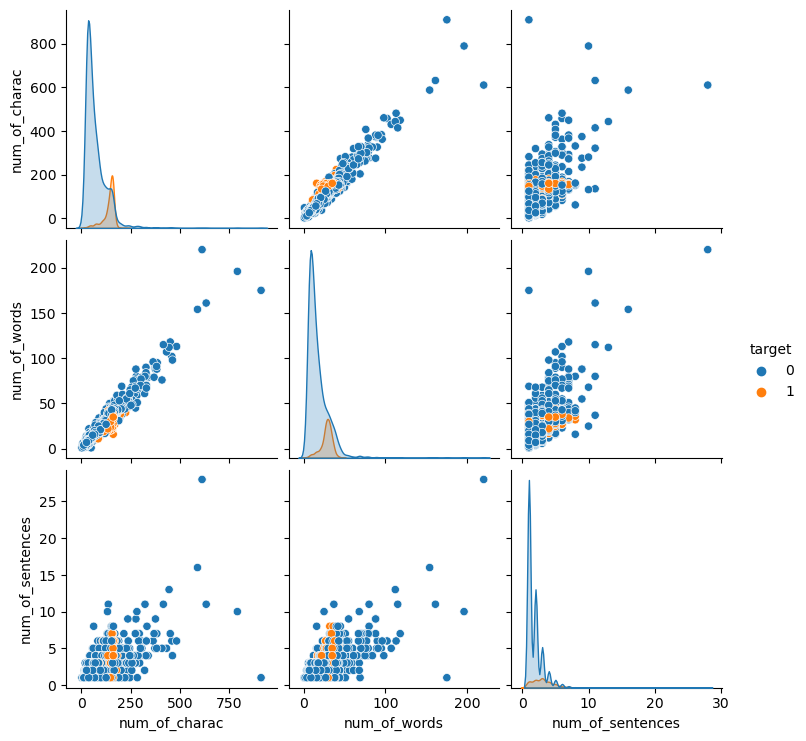

In [30]:
sns.pairplot(df1, hue='target')

In [31]:
df1.corr()

C:\Users\PrarshShringi\AppData\Local\Temp\ipykernel_18080\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,target,num_of_charac,num_of_words,num_of_sentences
target,1.000000,0.384717,0.262984,0.284901
num_of_charac,0.384717,1.000000,0.965770,0.638143
num_of_words,0.262984,0.965770,1.000000,0.684541
num_of_sentences,0.284901,0.638143,0.684541,1.000000


C:\Users\PrarshShringi\AppData\Local\Temp\ipykernel_18080\272655420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

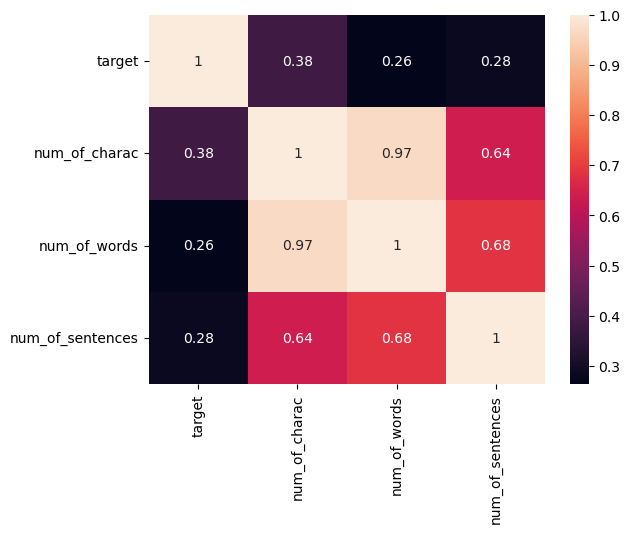

In [32]:
sns.heatmap(df1.corr(),annot=True)

<h2 <span style="color: orange;">TEXT PREPROCESSING / DATA PREPROCESSING --</span> </h2> 

In [33]:
# LOWER CASE
# TOKENIZATION 
# remove stopwords
# stemming

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')


from string import punctuation
from nltk.corpus import stopwords

from nltk.stem import SnowballStemmer
snbl = SnowballStemmer("english")

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)
            
    
    text = y[:]
    y.clear()
        
    for i in text:
        y.append(snbl.stem(i))
    
        
    return " ".join(y)

In [34]:
transform_text('How was your [running in] the marathon around lake ?')

'run marathon around lake'

In [35]:
df1["transformed_text"] = df1["text"].apply(transform_text)

In [36]:
df1.head()

,target,text,num_of_charac,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


<h2 <span style="color: gold;">WORD CLOUD --</span> </h2> 

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
from wordcloud import WordCloud

wc = WordCloud(width = 600, height=600, min_font_size=10, background_color = 'white')


In [39]:
SPAM_wc = wc.generate(df1[df1["target"]== 1]['transformed_text'].str.cat(sep=" "))

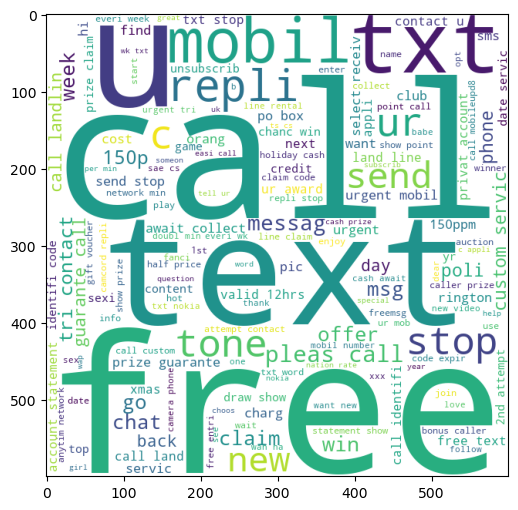

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(SPAM_wc)

In [41]:
HAM_wc = wc.generate(df1[df1["target"]== 0]['transformed_text'].str.cat(sep=" "))

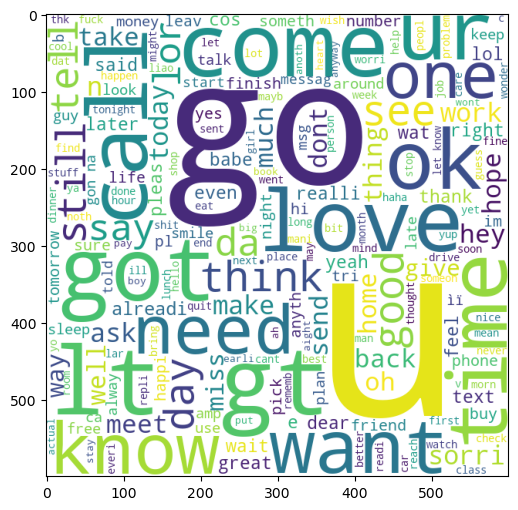

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(HAM_wc)

In [43]:
df1[df1["target"] == 1]["transformed_text"] .tolist()

['free entri 2 wkli comp win fa cup final tkts 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chgs send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli yes repli charg',
 '07732584351 rodger burn msg tri call repli sms free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow'

In [44]:
spam_corpus = []

for spam_msg in df1[df1["target"]==1]["transformed_text"].tolist():
    for word in spam_msg.split():
        spam_corpus.append(word)
        
        
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ld

In [45]:
len(spam_corpus)

9939

In [46]:
pip install collection

Note: you may need to restart the kernel to use updated packages.


In [47]:
# This is used to create a python dict for the words and there occurence

from collections import Counter 

df_cnt = pd.DataFrame(Counter(spam_corpus).most_common(30))
df_cnt

,0,1
0,call,320
1,free,191
2,2,155
3,txt,130
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


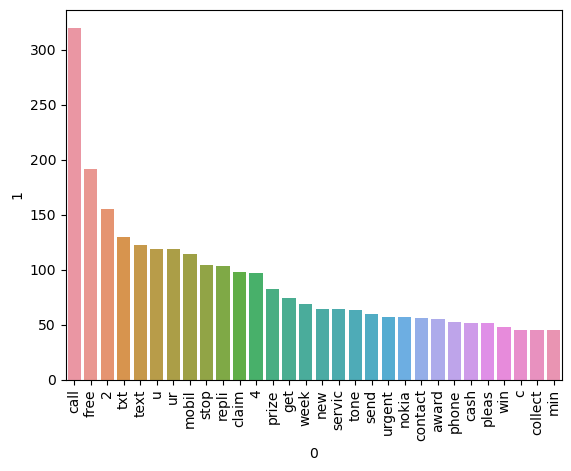

In [48]:
sns.barplot(x = df_cnt[0], y = df_cnt[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [49]:
ham_corpus = []

for ham_msg in df1[df1["target"]==0]["transformed_text"].tolist():
    for word in ham_msg.split():
        ham_corpus.append(word)
        
        
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'yes',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'w

In [50]:
from collections import Counter 

df_cnt_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
df_cnt_ham

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


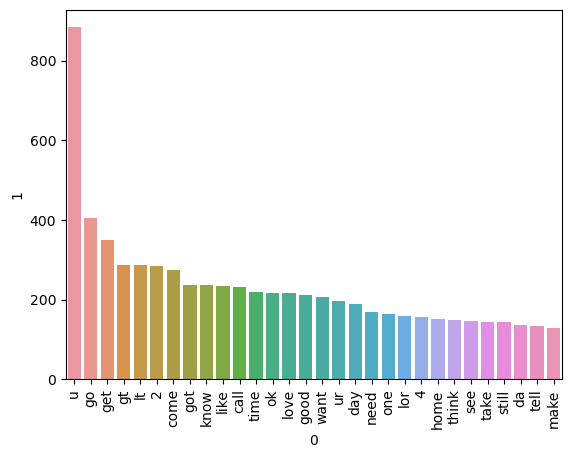

In [51]:
sns.barplot(x = df_cnt_ham[0], y = df_cnt_ham[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [52]:
df1['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

<h2 <span style="color: CORAL;">MODEL BUILDING --</span> </h2> 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [54]:
X = tfidf.fit_transform(df1['transformed_text']).toarray()

In [55]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
X.shape

(5169, 6701)

In [57]:
y = df1['target'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.2, random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb.fit(X_train,Y_train)

Y_pred_gb = gnb.predict(X_test)

print(accuracy_score(Y_test, Y_pred_gb))

print(precision_score(Y_test, Y_pred_gb))

0.879110251450677
0.5299539170506913


In [62]:
mnb.fit(X_train,Y_train)

Y_pred_mb = mnb.predict(X_test)

print(accuracy_score(Y_test, Y_pred_mb))

print(precision_score(Y_test, Y_pred_mb))

0.9593810444874274
1.0


In [63]:
bnb.fit(X_train,Y_train)

Y_pred_b = bnb.predict(X_test)

print(accuracy_score(Y_test, Y_pred_b))

print(precision_score(Y_test, Y_pred_b))

0.9700193423597679
0.9734513274336283


In [64]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [67]:
classifiers = {
    
    'SVC' : svc,
    'KN' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [68]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred )
    return accuracy, precision

In [69]:
train_classifier(lrc,X_train, Y_train, X_test, Y_test)

(0.9497098646034816, 0.9479166666666666)

In [70]:
accuracy_scores = []
precision_scores = []

for name, clf in classifiers.items():
    
    current_accuracy, current_precision = train_classifier(clf,X_train, Y_train, X_test, Y_test)
    
#     print("For ",name)
#     print("Accuracy ", current_accuracy)
#     print("Precision ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

In [71]:
perfomance_df = pd.DataFrame({"Algorithm": classifiers.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores})

In [72]:
perfomance_df

,Algorithm,Accuracy,Precision
0,SVC,0.973888,0.974359
1,KN,0.899420,1.000000
2,MNB,0.959381,1.000000
3,DTC,0.936170,0.846154
4,LR,0.949710,0.947917
5,RF,0.973888,0.982609
6,AdaBoost,0.953578,0.924528
7,Bgc,0.960348,0.864662
8,ETC,0.977756,0.975207
9,GBDT,0.948743,0.920792


In [73]:
perfomance_df.sort_values('Precision', ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.899420,1.000000
2,MNB,0.959381,1.000000
5,RF,0.973888,0.982609
8,ETC,0.977756,0.975207
0,SVC,0.973888,0.974359
10,xgb,0.975822,0.966942
4,LR,0.949710,0.947917
6,AdaBoost,0.953578,0.924528
9,GBDT,0.948743,0.920792
7,Bgc,0.960348,0.864662


In [74]:
# transformed_sms = transform_text(input_message)

In [75]:
# vectoried_input = tfidf.transform([transformed_sms])

In [76]:
# mnb.predict(vectoried_input)

In [77]:
def predict_spam_or_ham(input_message, vectorizer, classifier):
    transformed_sms = transform_text(input_message)
    vectorized_input = vectorizer.transform([transformed_sms])
    prediction = classifier.predict(vectorized_input)

    if prediction[0] == 0:
        return "HAM"
    else:
        return "SPAM"




In [78]:
input_message = input("Enter a message: ")
result = predict_spam_or_ham(input_message, tfidf, mnb)
print(f'The message is classified as: {result}')

Enter a message: claim your gift
The message is classified as: SPAM
